
Hello and welcome to this porfolio project (Life Expectancy and GDP)

This project is part of the Data Science: Machine Learning specialist career path  provided by Codecademy

I would like to thank anyone who dedicated time to review this project 

-----------------------------------------------------------------------------------------------------------------


The premise of the project is to explore the relationship between Life expectancy and GDP.

            Life expectancy being the average number of years a person is expected to live typically "calculated" at birth
            
            GDP short for the Gross Domestic Product being the total market value of all final goods and services produced                                     within a country's borders in a given year. (A measure for the economy)
            
            Note: GPD in this case is in US dollars
            
The dataset contains 16 measured values for life expectancy and GDP for 16 years ranging from 2000 untill 2015.

The data are provided for six countries : Chile, China, Germany, Mexico, The United States, Zimbabwe .


-----------------------------

I would like to tackle three main goals and hopefully provided an asnwer for them.

        1. What is the relationship between Life expectancy and GDP ?
        2. How did Life expectancy and GDP progress over time ?
        3. How does the Average life expectancy differ across the countries ?
        
-----------------------

In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
# Load the dataset into a dataframe 

Life_e =  pd.read_csv('all_data.csv')
print(f"{len(Life_e)} rows") 

96 rows


In [18]:
# Inspect some rows

print(Life_e.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [19]:
# Adjusting life expectancy column name

Life_e.rename(columns = {'Life expectancy at birth (years)':'Life_expectancy'},inplace = True)

In [20]:
# Making sure that the data types are in line with what is expected 

Life_e.dtypes

Country             object
Year                 int64
Life_expectancy    float64
GDP                float64
dtype: object

In [21]:
# Converting Country into string data type

Life_e.Country = Life_e.Country.astype('string')
Life_e.dtypes

Country            string[python]
Year                        int64
Life_expectancy           float64
GDP                       float64
dtype: object

In [22]:
# To understand the GDP, another column will be added to display the price (string datatype)

Life_e["GDP_f"] = Life_e.GDP.apply(lambda x: f"{x/1e9:.3f} Billion")  # 1e9 = 1 x (10 to the power of 9) 
print(Life_e.head())

  Country  Year  Life_expectancy           GDP           GDP_f
0   Chile  2000             77.3  7.786093e+10  77.861 Billion
1   Chile  2001             77.3  7.097992e+10  70.980 Billion
2   Chile  2002             77.8  6.973681e+10  69.737 Billion
3   Chile  2003             77.9  7.564346e+10  75.643 Billion
4   Chile  2004             78.0  9.921039e+10  99.210 Billion


In [23]:
Life_e.isna().any() # Seems like there are no missing values

Country            False
Year               False
Life_expectancy    False
GDP                False
GDP_f              False
dtype: bool

In [24]:
# Before addressing the relationship between GDP and Life expectancy lets review some summary statistics
Life_e.describe()

,Year,Life_expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [25]:
# Min and Max GDP values 
minimum = Life_e.GDP.min()
maximum = Life_e.GDP.max()

Life_e[Life_e.GDP == minimum] # Relating other variabels to the minimum and the maximum GDP value


,Country,Year,Life_expectancy,GDP,GDP_f
88,Zimbabwe,2008,48.2,4.415703e+09,4.416 Billion


In [26]:
Life_e[Life_e.GDP == maximum]

,Country,Year,Life_expectancy,GDP,GDP_f
79,United States of America,2015,79.3,1.810000e+13,18100.000 Billion


In [27]:
# Min and Max Life Expectancy

minimum = Life_e.Life_expectancy.min()
maximum = Life_e.Life_expectancy.max()

print(f"min: {minimum} years , max: {maximum} years")


min: 44.3 years , max: 81.0 years


In [28]:
# Understanding both the mean value and the variation in GDP values and Life expectancy 
mean_gdp = Life_e.GDP.mean()
mean_life_e = Life_e.Life_expectancy.mean()


st_dev_gdp = Life_e.GDP.std()
st_dev_life_e = Life_e.Life_expectancy.std()



In [29]:
print(f"Typical GDP value (mean): {mean_gdp}$")
print(f"Typical life expectancy (mean): {mean_life_e} years")

Typical GDP value (mean): 3880498570768.396$
Typical life expectancy (mean): 72.78958333333334 years


In [30]:
print(f"The standard variation of GDP : {st_dev_gdp}$")
print(f"The standard variation of Life expectancy : {st_dev_life_e} years") # The higher the value the more varying the data is, 
                                                                      # meaning that they are farthur away from the center(mean) 


The standard variation of GDP : 5197561310975.917$
The standard variation of Life expectancy : 10.6728823036079 years


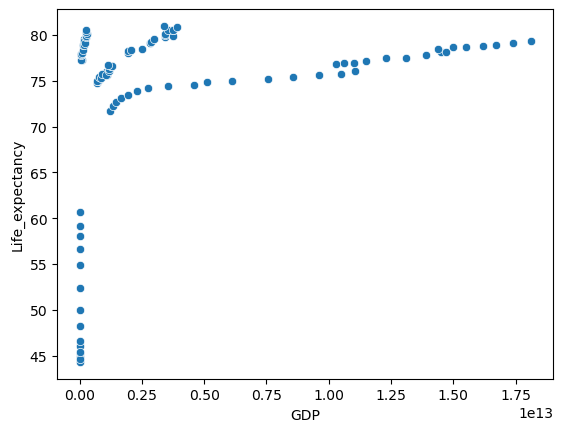

<Figure size 640x480 with 0 Axes>

In [33]:
# Inspecting the scatter plot of both Life Expectancy and GDP

sns.scatterplot(y='Life_expectancy',x='GDP',data = Life_e)
plt.show()
plt.clf()


The scatter plot has some indicate a positive relationship where the GDP increases, the Life expectancy in that country also does, to determine that pearson correlation factor is used here

In [35]:
pval,st = scipy.stats.pearsonr(Life_e.GDP,Life_e.Life_expectancy)
print(pval)

0.34320674844915594


The pval = 0.34320674844915594 > 0.05 determining there is not a statistically significant correlation between GDP and life expectancy -> which could be becuase of many factors (e.g. the dataset being too small to provide concrete evedince) 

It is important to remember that correlation does not equal causation. Just because there is not a  significant correlation between GDP and life expectancy does not mean that GDP does not cause life expectancy to increase. It is possible that there is a causal relationship between the two variables, but it is not possible to detect it with the current data.